In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [6]:
df = pd.read_csv('DS2_C5_S3_HR_Data_Practice.csv')

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# TASK1

In [8]:
tz=pd.pivot_table(data=df[['left','salary']],index=df['salary'],columns='left',aggfunc='count')
tz

salary      
left        0     1
salary             
high     1155    82
low      5144  2172
medium   5129  1317

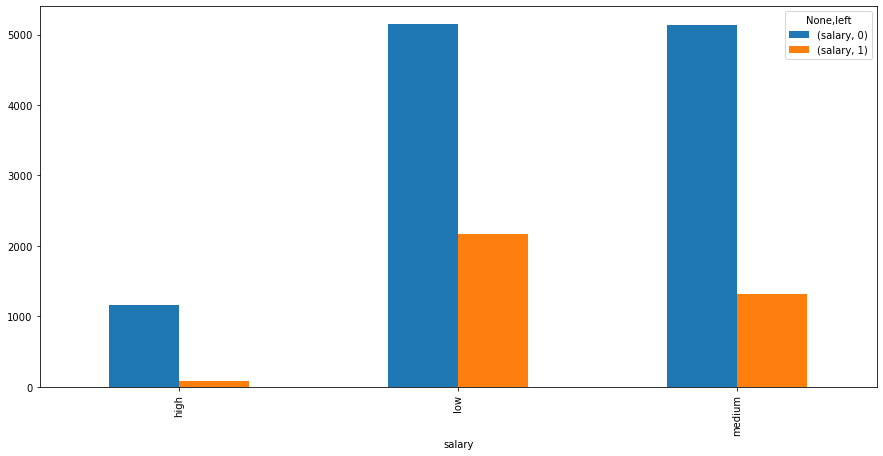

In [9]:
tz.plot.bar(figsize=(15,7));

In [10]:
tz=pd.pivot_table(data=df[['left','Department']],index=df['Department'],columns='left',aggfunc='count')
tz

Department      
left                 0     1
Department                  
IT                 954   273
RandD              666   121
accounting         563   204
hr                 524   215
management         539    91
marketing          655   203
product_mng        704   198
sales             3126  1014
support           1674   555
technical         2023   697

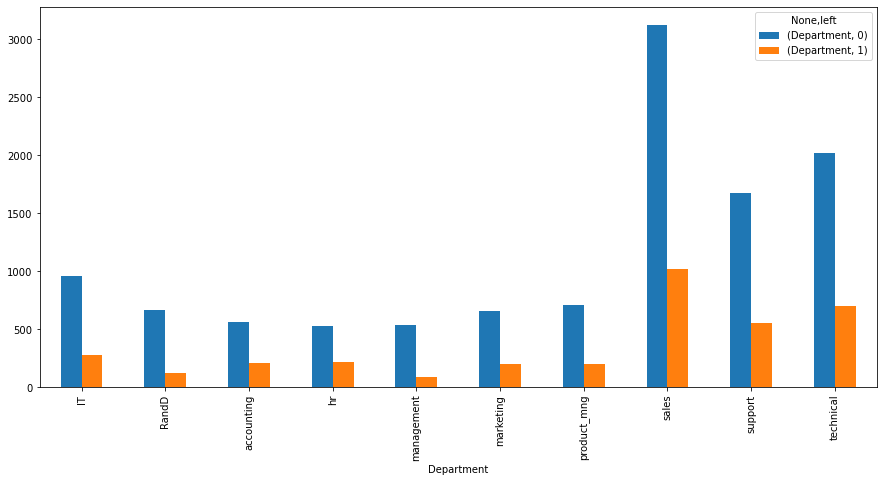

In [11]:
tz.plot.bar(figsize=(15, 7));


# TASK2

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [14]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
df['Department']= label_encoder.fit_transform(df['Department'])
df['salary']= label_encoder.fit_transform(df['salary'])

In [17]:
df.corr()['left'].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
Department               0.032105
number_project           0.023787
last_evaluation          0.006567
salary                  -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

In [18]:
X=df.drop('left',axis=1)
y=df.left

In [19]:
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size= .7) 

In [53]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


# TASK3

In [20]:
model=GaussianNB()

In [21]:
model.fit(X_train,y_train)

GaussianNB()

In [22]:
pred1=model.predict(X_test)
pred1

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [23]:
model.score(X_test,y_test)

0.7822222222222223

In [24]:
model.score(X_train,y_train)

0.7949328507476903

In [25]:
accuracy_score(y_test,pred1)

0.7822222222222223

In [26]:
from sklearn.inspection import  permutation_importance

In [27]:
a = permutation_importance(model,X_test,y_test).importances_mean

In [28]:
b=X_test.columns

In [29]:
pd.DataFrame(a,b,columns=['Co-relation'])

,Co-relation
satisfaction_level,0.051467
last_evaluation,0.003867
number_project,0.034311
average_montly_hours,0.007067
time_spend_company,0.015556
Work_accident,0.014756
promotion_last_5years,0.002444
Department,-0.000978
salary,0.000578


# TASK4

In [30]:
from sklearn import tree
model1=tree.DecisionTreeClassifier(max_depth=3)

In [31]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
pred2=model1.predict(X_test)
pred2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
model1.score(X_test,y_test)

0.956

In [34]:
model1.score(X_train,y_train)

0.9516144394704258

In [35]:
accuracy_score(y_test,pred2)

0.956

In [36]:
CM2=confusion_matrix(y_test,pred2)
CM2

array([[3308,  111],
       [  87,  994]], dtype=int64)

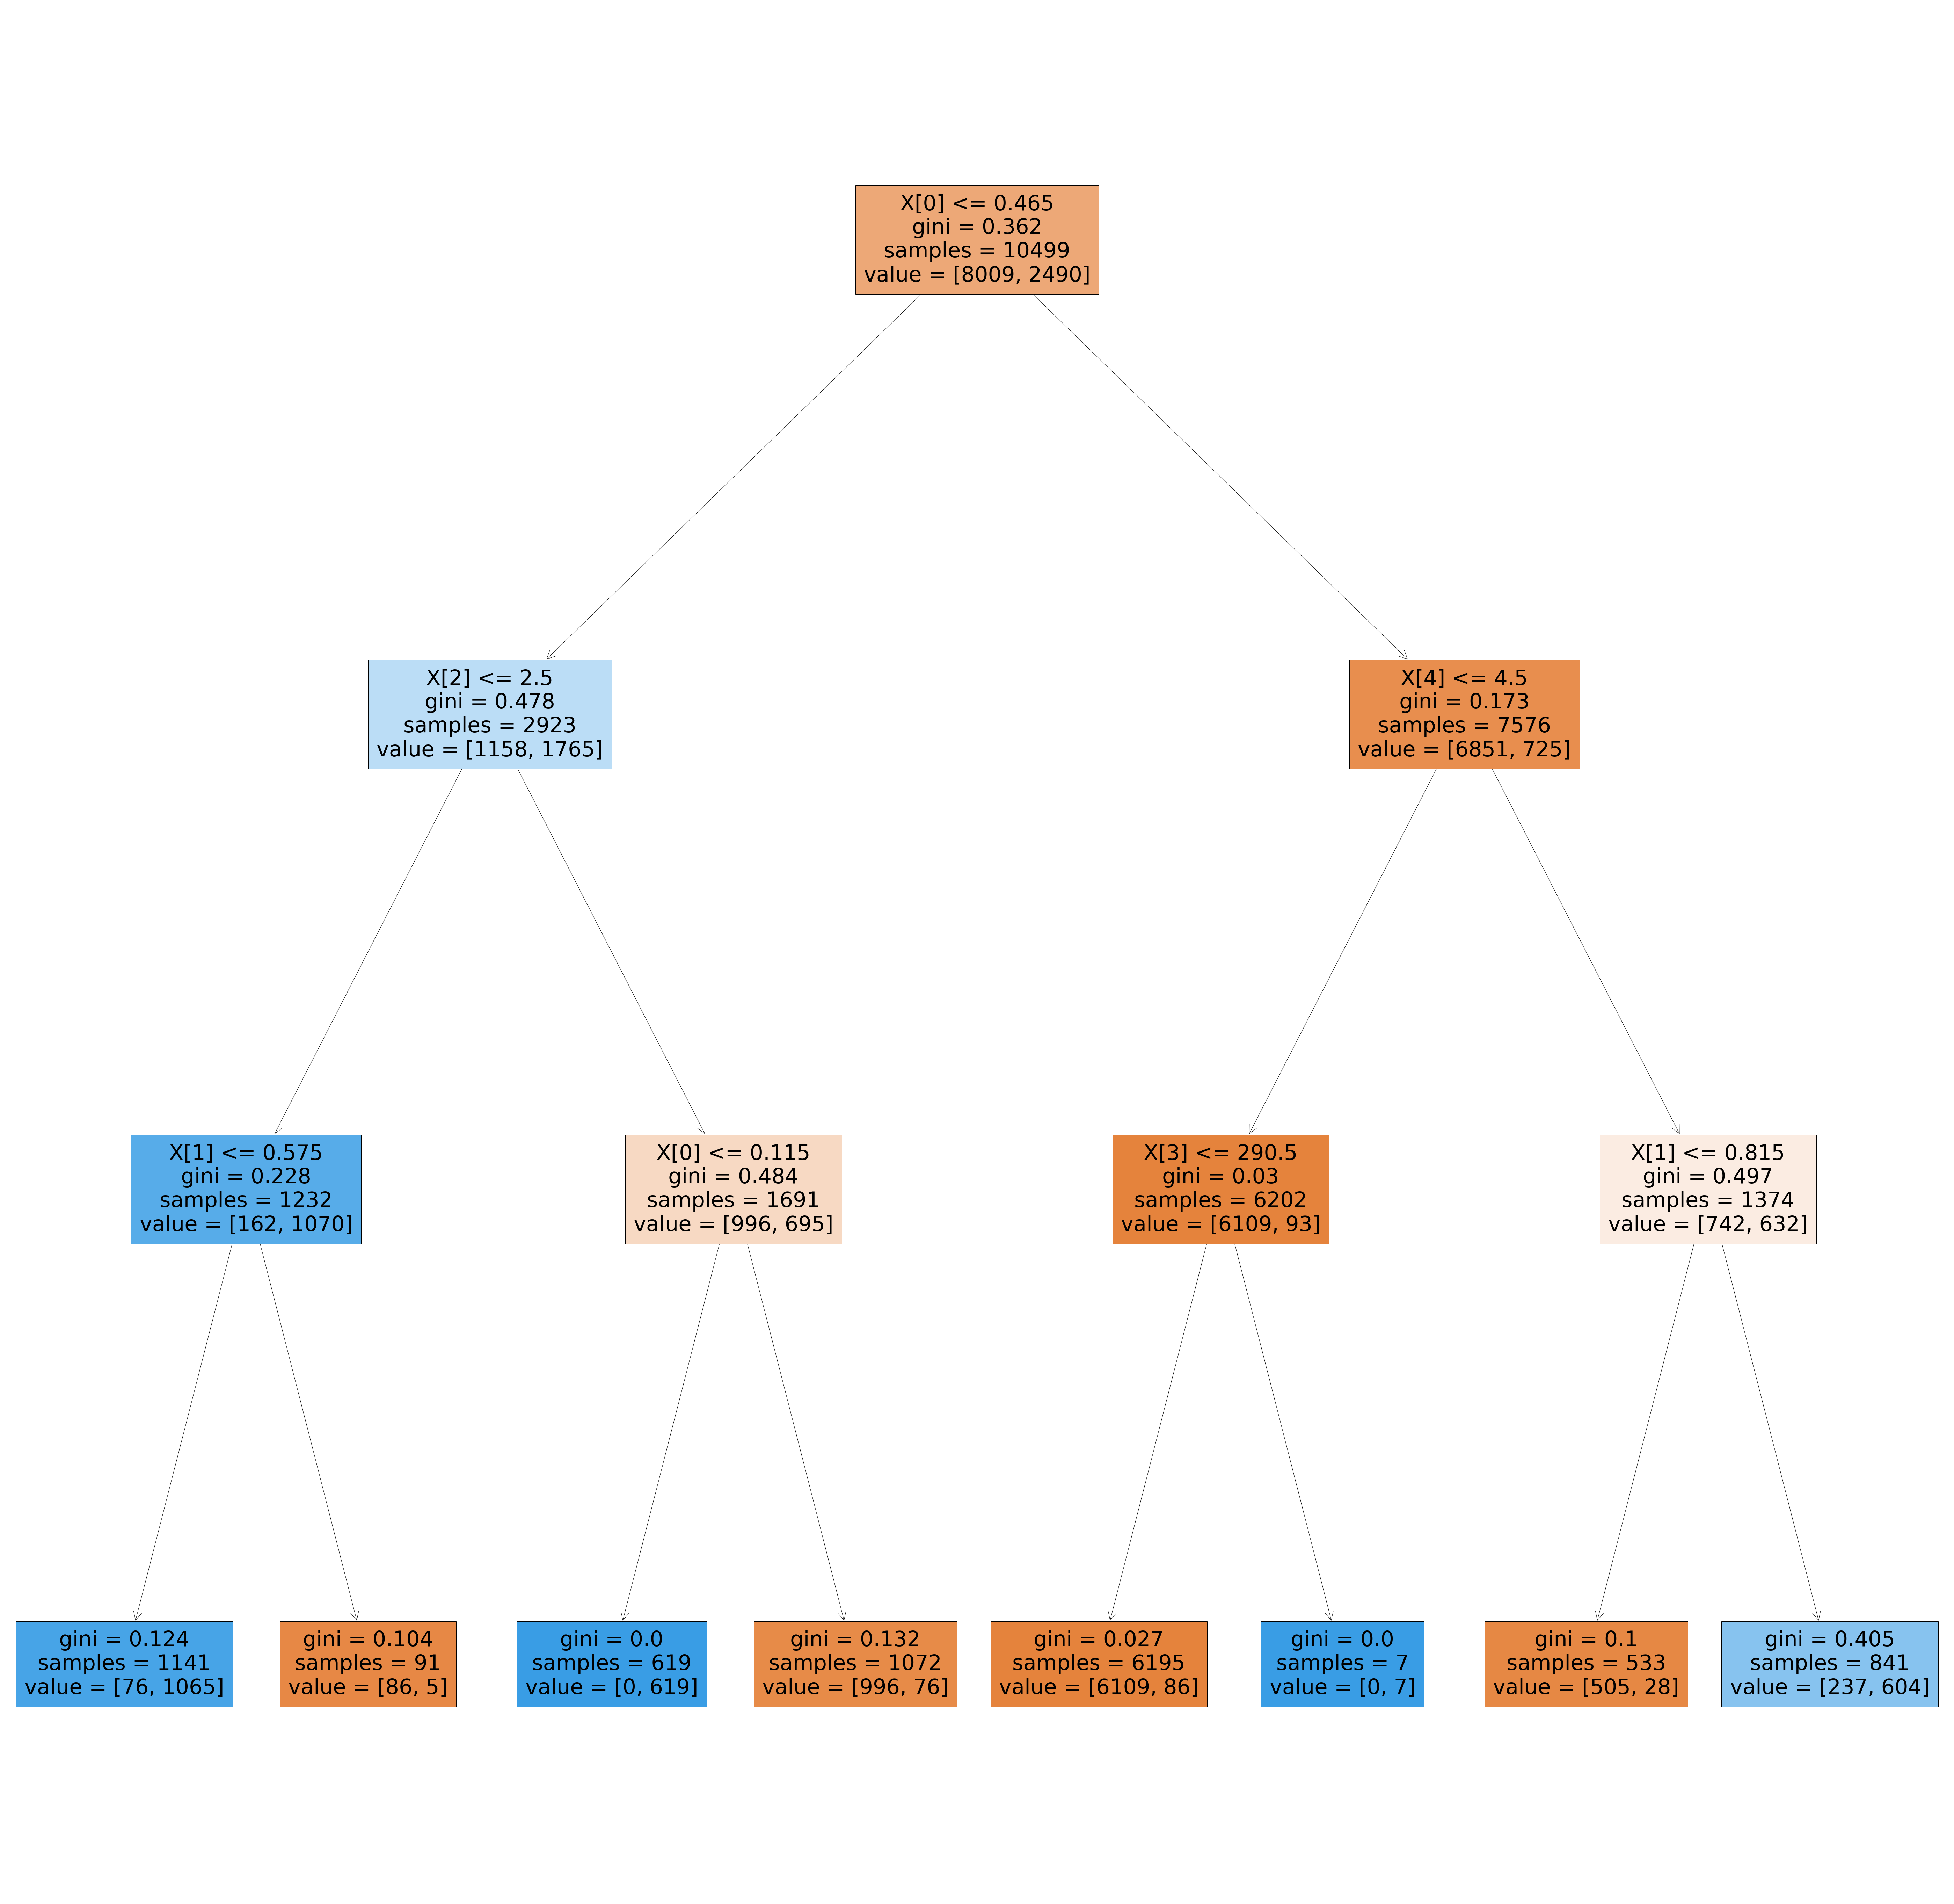

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
tree.plot_tree(model1, filled=True,);

# TASK5

In [38]:
print(confusion_matrix(y_test,pred1)) #Naive Bayes 

[[2740  679]
 [ 301  780]]


In [39]:
print(confusion_matrix(y_test,pred2)) #Descision Tree

[[3308  111]
 [  87  994]]


In [40]:
#For Naive Bayes

In [41]:
print('Accuracy:', accuracy_score(y_test, pred1))
print('Recall:', recall_score(y_test, pred1))
print('f1-score:', f1_score(y_test, pred1))
print('Precision:', precision_score(y_test, pred1))

Accuracy: 0.7822222222222223
Recall: 0.7215541165587419
f1-score: 0.6141732283464566
Precision: 0.5346127484578478


In [42]:
#For DescissionTree

In [43]:
print('Accuracy:', accuracy_score(y_test, pred2))
print('Recall:', recall_score(y_test, pred2))
print('f1-score:', f1_score(y_test, pred2))
print('Precision:', precision_score(y_test, pred2))

Accuracy: 0.956
Recall: 0.9195189639222942
f1-score: 0.909423604757548
Precision: 0.8995475113122172


In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
#For Naive Bayes

In [46]:
auc = roc_auc_score(y_test, pred1)
print('AUC: %.3f' % auc)

AUC: 0.761


In [47]:
#For DescissionTree

In [48]:
auc = roc_auc_score(y_test, pred2)
print('AUC: %.3f' % auc)

AUC: 0.944


In [49]:
#for Naive Bayes Curve

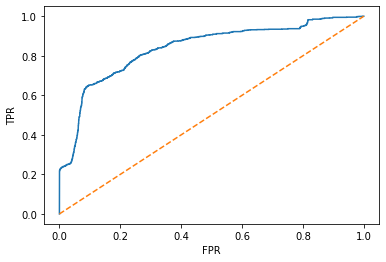

In [50]:
from sklearn.metrics import roc_curve
positive_prob=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, positive_prob)
plt.plot(fpr,tpr,label="Logistic Regression")
plt.plot([0,1],[0,1],linestyle='--',label="No skill")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [51]:
#for DescissionTree

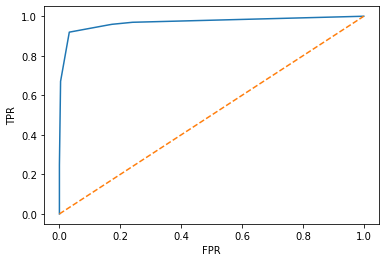

In [52]:
positive_prob=model1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, positive_prob)
plt.plot(fpr,tpr,label="Logistic Regression")
plt.plot([0,1],[0,1],linestyle='--',label="No skill")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Decision Tree Classification is the best model to predict the retension of employees 

In [56]:
model.predict([[0.3,0.53,2,157,3,0,0,0.5,1]])

C:\Users\yogesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)